# Understand data 

<div style="border: 2px solid #008CBA; border-radius: 10px; padding: 20px; background-color: #f0f8ff; font-family: sans-serif;">
    <h1 style="color: #005f73; border-bottom: 2px solid #005f73; padding-bottom: 10px;">
        Project Step 1: Data Loading & Initial Exploration
    </h1>
    
<p style="font-size: 1.1em; color: #333;">
        This initial phase is the foundation of our project. The primary goal is to load the IMDb dataset and perform a thorough exploratory data analysis (EDA) to understand its structure, content, and characteristics before any cleaning or modeling.
    </p>

<h2 style="color: #0077b6;">Key Objectives & Actions</h2>
    
<ol style="list-style-type: decimal; padding-left: 20px; font-size: 1.05em; color: #333;">
        <li style="margin-bottom: 15px;">
            <strong>Environment Setup:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Imported essential Python libraries: <code>pandas</code> for data manipulation, and <code>matplotlib</code>/<code>seaborn</code> for visualization.</li>
                <li>Set a consistent and readable style for all our plots.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Data Loading:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Loaded the <code>IMDB Dataset.csv</code> into a pandas DataFrame named <code>df</code>.</li>
                <li>Used a <code>try-except</code> block for robust error handling in case the file path is incorrect.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Initial Data Inspection (Health Check):</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Checked the dataset's dimensions (shape): 50,000 rows and 2 columns.</li>
                <li>Examined the first and last few rows using <code>df.head()</code> and <code>df.tail()</code> to get a qualitative feel for the data.</li>
                <li>Used <code>df.info()</code> to confirm column data types (<code>object</code> for both) and check for non-null counts.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Analysis & Visualization:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li><strong>Target Variable Analysis:</strong> Analyzed the <code>sentiment</code> column distribution and confirmed the dataset is perfectly balanced (25,000 positive, 25,000 negative).</li>
                <li><strong>Feature Content Exploration:</strong> Inspected individual raw reviews, noting the presence of HTML tags (<code>&lt;br /&gt;</code>), punctuation, and varied capitalization, which highlights the need for text preprocessing.</li>
                <li><strong>Review Length Analysis:</strong> Calculated and plotted the distribution of review lengths (character count) to check for outliers and compare characteristics between positive and negative reviews.</li>
            </ul>
        </li>
    </ol>

<div style="background-color: #e0f2f1; border-left: 5px solid #00897b; padding: 15px; margin-top: 20px;">
        <h3 style="color: #004d40; margin-top: 0;">Key Findings & Conclusion</h3>
        <p style="color: #333; margin: 0;">
            The dataset is <strong>complete</strong> (no missing values) and <strong>perfectly balanced</strong>, which is ideal for a classification task. The 'review' text is raw and will require a comprehensive cleaning pipeline. We are now well-prepared to proceed to the <strong>Data Cleaning and Preprocessing</strong> step.
        </p>
    </div>
</div>


In [1]:
# Import foundational libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for our plots for better readability
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight') # A popular style for clear plots

print("--- Step 1: Environment Setup ---")
print("Essential libraries imported successfully.")


file_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset successfully loaded from: {file_path}")
except FileNotFoundError:
    print(f"ERROR: The file was not found at '{file_path}'.")
    print("Please ensure the dataset is correctly attached to the notebook.")
    # In case you run this on your local machine, you might need to change the path.
    # For example: df = pd.read_csv('IMDB Dataset.csv')



--- Step 1: Environment Setup ---
Essential libraries imported successfully.
Dataset successfully loaded from: /kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
print("--- Step 2: Initial Data Inspection ---")

# Display the total number of rows and columns
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("The columns are:", df.columns.tolist())

# Display the first 5 rows to see a sample of the data
print("\n--- First 5 Rows (Head) ---")
print(df.head())

# Display the last 5 rows to ensure data is consistent throughout
print("\n--- Last 5 Rows (Tail) ---")
print(df.tail())

# Get a concise summary of the DataFrame: column names, non-null counts, and data types
print("\n--- DataFrame Info ---")
df.info()

# Check for the sum of null (missing) values in each column
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- Step 2: Initial Data Inspection ---
The dataset has 50000 rows and 2 columns.
The columns are: ['review', 'sentiment']

--- First 5 Rows (Head) ---
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

--- Last 5 Rows (Tail) ---
                                                  review sentiment
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

--- DataFrame Info ---
<class 'pandas.c


--- Step 3: Analyzing the Target Variable ('sentiment') ---
Distribution of sentiments:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


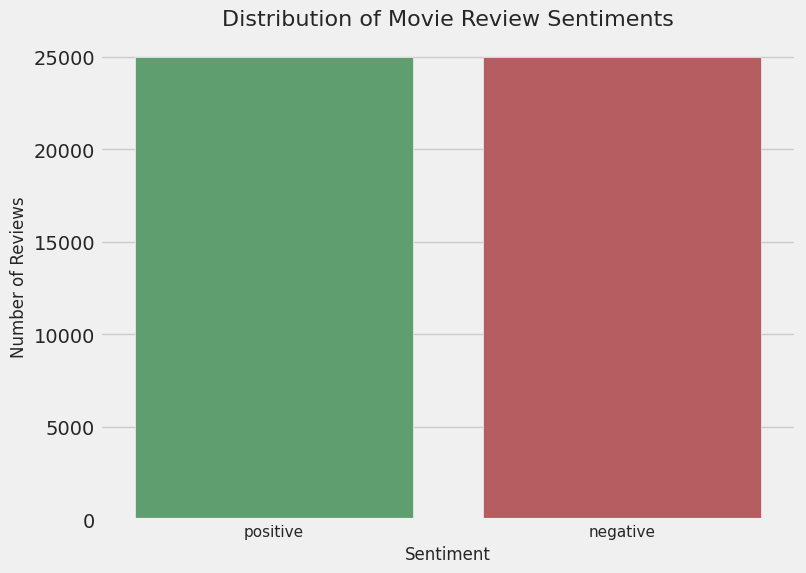

In [3]:
print("\n--- Step 3: Analyzing the Target Variable ('sentiment') ---")

# Get the count of each unique value in the 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()
print("Distribution of sentiments:")
print(sentiment_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette=['#55a868', '#c44e52']) # Green for positive, Red for negative
plt.title('Distribution of Movie Review Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=11)
plt.show()



 --- Step 4: Exploring the 'review' Content ---
--- Example of a POSITIVE review ---
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements ar

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

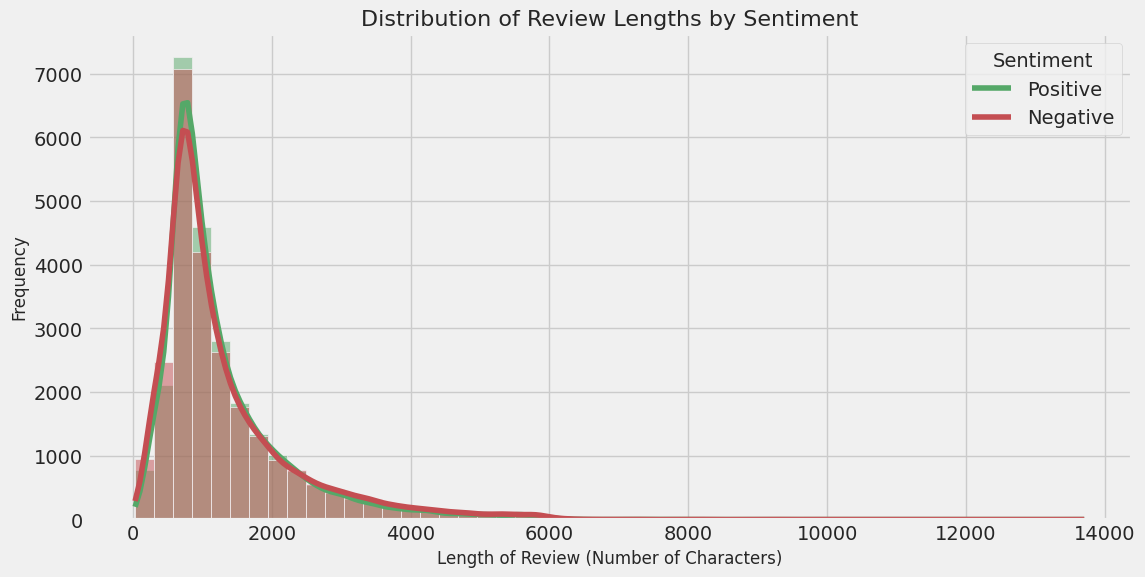


--- Descriptive Statistics for Review Lengths ---
             count        mean          std   min    25%    50%      75%  \
sentiment                                                                  
negative   25000.0  1294.06436   945.892669  32.0  706.0  973.0  1567.25   
positive   25000.0  1324.79768  1031.492627  65.0  691.0  968.0  1614.00   

               max  
sentiment           
negative    8969.0  
positive   13704.0  


In [4]:
print("\n --- Step 4: Exploring the 'review' Content ---")

# Display a full positive review (let's pick the first one)
print("--- Example of a POSITIVE review ---")
positive_example = df[df['sentiment'] == 'positive']['review'].iloc[0]
print(positive_example)

# Display a full negative review (let's pick the first one)
print("\n--- Example of a NEGATIVE review ---")
negative_example = df[df['sentiment'] == 'negative']['review'].iloc[0]
print(negative_example)


# Let's analyze the length of the reviews
df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True, palette=['#c44e52', '#55a868'])
plt.title('Distribution of Review Lengths by Sentiment', fontsize=16)
plt.xlabel('Length of Review (Number of Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
plt.show()

print("\n--- Descriptive Statistics for Review Lengths ---")
print(df.groupby('sentiment')['review_length'].describe())
